## Introduction

##### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


##### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


## Importing dependecies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### Data collection & Analysis

In [2]:
df=pd.read_csv(r'C:\Users\user\Documents\Project datasets\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
## Finding the number of rows & Columns
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
## Checking for missjng values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.groupby('Gender')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


In [10]:
df.groupby('Gender')['Age'].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

Choosing Annual Income (k$) & Spending Score (1-100) to classify customers

In [11]:
x=df.iloc[:,[3,4]].values

In [14]:
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

Choosing # of clusters

using WCSS--> Withing cluster sum of squares, finds the distance between each data point and the centroid

In [16]:
## finding Wcss for different number of clusters

wcss=[]

for i in range(1,11) :## taking values from 1-10
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)  ## calculates the wcss
    wcss.append(kmeans.inertia_) ### inertia_ gives us the values
    

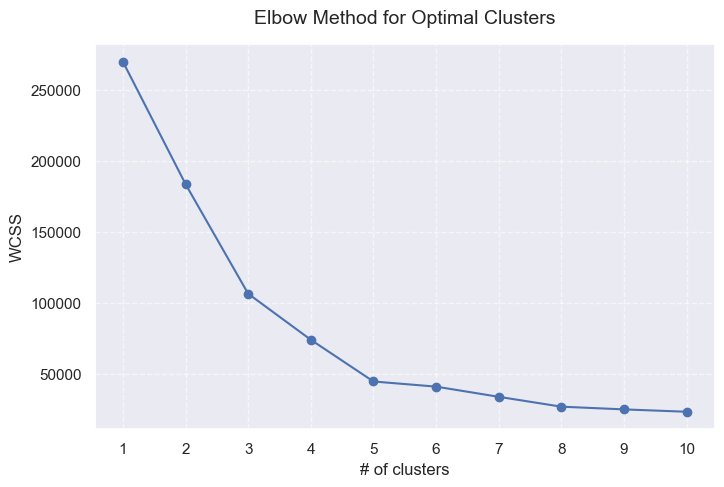

In [23]:
##Plot the elbow graph

plt.figure(figsize=(8, 5))
plt.plot(range(1,11), wcss, marker='o', linestyle='-', color='b')


# Add title, labels, and grid
plt.title('Elbow Method for Optimal Clusters', fontsize=14, pad=15)
plt.xlabel('# of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1,11))
plt.show()

~~ After 5 number of clusters there's no sharp significant drop, so we there are 5 optimal number of clusters

### Training the K-means Model

In [25]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

# return a label for each observation/data point based on thier cluster

y=kmeans.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


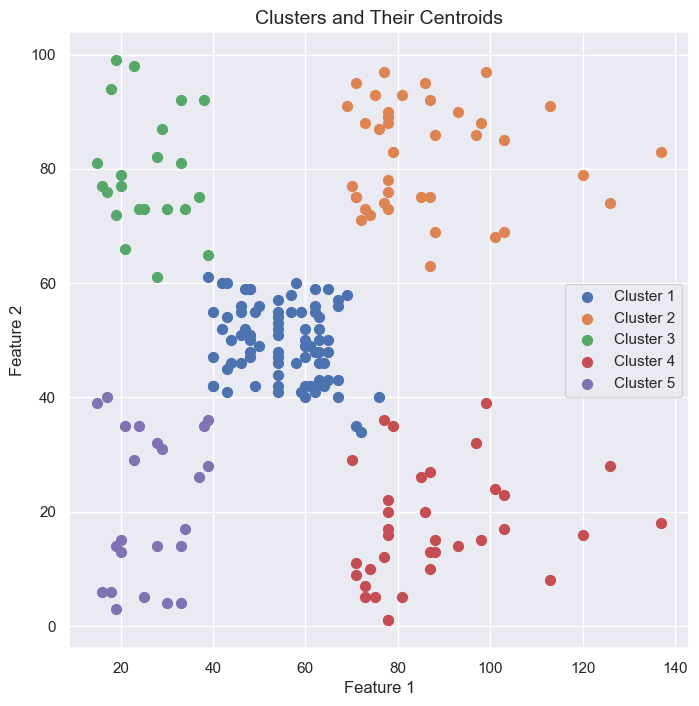

In [31]:

# Example data shapes: x (n_samples, n_features), y (n_samples)
# Replace `x` and `y` with your actual data and cluster assignments.

plt.figure(figsize=(8, 8))

# Assuming `x` is 2D and `y` contains cluster labels
for cluster in range(max(y) + 1):  # Loop through clusters
    plt.scatter(
        x[y == cluster, 0],  # x-coordinates of cluster points
        x[y == cluster, 1],  # y-coordinates of cluster points
        s=50,
        label=f"Cluster {cluster + 1}"
    )

# Optional: Add centroids if available (e.g., `centroids` array)
# Uncomment this if centroids are defined as a 2D array (n_clusters, n_features).
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="black", marker="x", label="Centroids")

plt.title("Clusters and Their Centroids", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## Commercial Recommendations

---> Give better offers to the group that does not buy alot, give discounts to them ,they will tend to buy more and improve customer    satisfaction



---> Give high spender less weighted discounts since they are keepn on buying or stretch their spend by marginal price increase